In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import webcolors
import matplotlib.colors as mc
import time
from os import listdir
from os.path import isfile, join
from os.path import exists
import os

In [2]:
cv2.__version__

'4.0.1'

In [3]:
    def PlotCv2ImageWithPlt(image, name = "no name"):
        RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(RGB_img, interpolation='none')
        plt.title(name)
        plt.show()
        
        
    def GetBBLocationColor(locationbb, img):
        xc, yc, w, h = locationbb
        return tuple(img[int(yc+h/2), int(xc+w/2)])   
    
    def RecognizeShape(approx, xc, yc, w, h, color_tuple):
        if len(approx) == 3:
            # cv2.putText(img, "Triangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
            shape = [1, xc, yc, w, h, color_tuple]
            # print(f"triangle x-{xc:4}, y-{yc:4}, width={w:3}, height={h:3}")
        elif len(approx) == 4:
            x, y, w, h = cv2.boundingRect(approx)
            aspectRatio = float(w) / h
            # print(aspectRatio);
            if 0.95 <= aspectRatio < 1.05:
                # cv2.putText(img, "square", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
                shape = ([2, xc, yc, w, h, color_tuple])
                # print(f"square x-{xc:4}, y-{yc:4}, width={w:3}, height={h:3}")
            else:
                # cv2.putText(img, "rectangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
                shape = ([3, xc, yc, w, h, color_tuple])
                # print(f"rectangle x-{xc:4}, y-{yc:4}, width={w:3}, height={h:3}")
        elif len(approx) == 5:
            # cv2.putText(img, "pentagon", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
            shape = ([4, xc, yc, w, h, color_tuple])
            # print(f"pentagon x-{xc:4}, y-{yc:4}, width={w:3}, height={h:3}")
        elif len(approx) == 6:
            # cv2.putText(img, "hexagon", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
            shape = ([5, xc, yc, w, h, color_tuple])
            # print(f"hexagon x-{xc:4}, y-{yc:4}, width={w:3}, height={h:3}")
        elif len(approx) == 10:
            # cv2.putText(img, "star", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
            shape = ([6, xc, yc, w, h, color_tuple])
            # print(f"star x-{xc:4}, y-{yc:4}, width={w:3}, height={h:3}")
        elif len(approx) == 12:
            # cv2.putText(img, "star", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
            shape = ([7, xc, yc, w, h, color_tuple])
            # print(f"star x-{xc:4}, y-{yc:4}, width={w:3}, height={h:3}")
        else:
            # cv2.putText(img, "circle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
            shape = ([8, xc, yc, w, h, color_tuple])
            # print(f"circle x-{xc:4}, y-{yc:4}, width={w:3}, height={h:3}")
        return shape
    
    
    def FullShapeToShapeName(shape):
        number = shape[0]
        if number == 1: return "Triangle"
        elif number == 2: return "Square"
        elif number == 3: return "Rectangle"
        elif number == 4: return "Pentagon"
        elif number == 5: return "Hexagon"
        elif number == 6: return "Star"
        elif number == 7: return "David Star"
        elif number == 8: return "Circle"
        else: return "Un Recognized Shape"


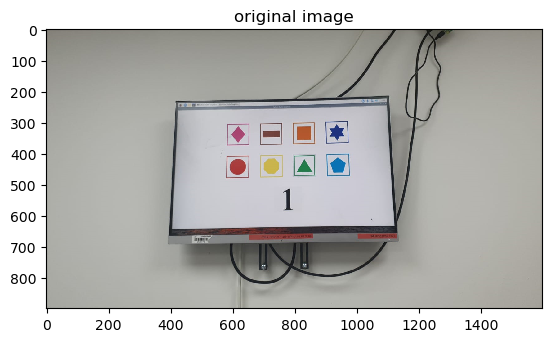

In [4]:
full_path = r"C:\Users\davidra\Desktop\NINJA_RAFAEL\Ninja2-master\DetectShapes\pic_test.jpg"
full_image = cv2.imread(full_path)
PlotCv2ImageWithPlt(full_image, "original image")

In [5]:
        gray = cv2.cvtColor(full_image, cv2.COLOR_BGR2GRAY)
        dst = cv2.Canny(gray, 0, 150)
        blured = cv2.blur(dst, (5, 5), 0)
        results = []
        img_thresh = cv2.adaptiveThreshold(blured, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
        Contours, _ = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        i = 0
        for contour in Contours:
            (xc, yc, w, h) = cv2.boundingRect(contour)
            if (w > 200) and (h > 200) and (yc > 10) and (xc > 10):
                i += 1
                print(f"xc {xc}, yc {yc}, w {w}, h {h}")
                cropped_image = full_image[yc:yc + h, xc:xc + w]
                results.append(cropped_image)
        

xc 399, yc 217, w 732, h 447


1


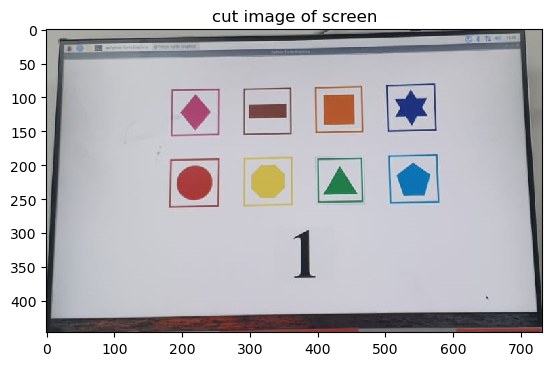

In [6]:
print(len(results))
PlotCv2ImageWithPlt(results[0], "cut image of screen")

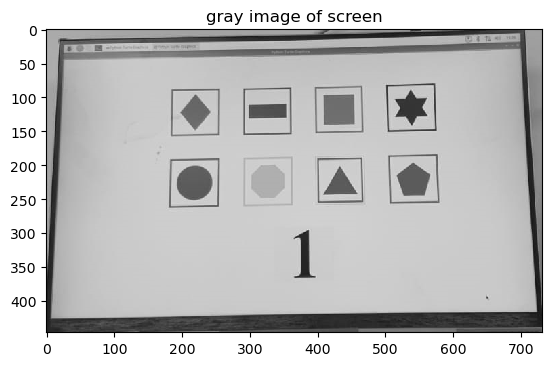

In [7]:
cropped_frame = results[0]
GrayImage = cv2.cvtColor(cropped_frame, cv2.COLOR_BGR2GRAY)
PlotCv2ImageWithPlt(GrayImage, "gray image of screen")

In [8]:

        dst = cv2.Canny(GrayImage, 0, 150)
        blured = cv2.blur(dst, (5, 5), 0)
        img_thresh = cv2.adaptiveThreshold(blured, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
        contours, hierarchy = cv2.findContours(img_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
        shapes_order = []
        cropped_shapes = []
        cropped_shapes_hierarchy = []
        cropped_shapes_index = []
        cropped_shapes_contour = []

        for i in range(len(contours)):
            contour = contours[i]
            approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
            x = approx.ravel()[0]
            y = approx.ravel()[1] - 5
            (xc, yc, w, h) = cv2.boundingRect(contour)
            color_tuple = GetBBLocationColor([xc, yc, w, h], cv2.cvtColor(cropped_frame, cv2.COLOR_BGR2RGB))
            aspect_ratio = w/h
            if 2 >= aspect_ratio >= 0.5 :
                if ((w >= 15 and h >= 15) and  hierarchy[0][i][2] != -1 and hierarchy[0][i][3] != -1) :
                    cropped_shape = cropped_frame[yc:yc + h, xc:xc + w]
                    cropped_shapes_contour.append(contour)
                    cropped_shapes.append(cropped_shape)
                    cropped_shapes_index.append(i)
                    cropped_shapes_hierarchy.append(hierarchy[0][i])
    
    
        filtered_cropped_shapes =[]
        filtered_cropped_numbers = []
        filtered_cropped_shapes_index = []
        filtered_cropped_shapes_bb = []
        for i in range(len(cropped_shapes)):
            parent_contour_index = cropped_shapes_hierarchy[i][3]
            (xc, yc, w, h) = cv2.boundingRect(cropped_shapes_contour[i])
            if (parent_contour_index in cropped_shapes_index):
                parent_index = cropped_shapes_index.index(parent_contour_index)
                (xcp, ycp, wp, hp) = cv2.boundingRect(cropped_shapes_contour[parent_index])
                if wp/hp > 1.3 and w/h < 1.3:
                    if w/h > 0.8 :
                        filtered_cropped_shapes.append(cropped_shapes[i])
                        filtered_cropped_shapes_index.append(cropped_shapes_index[i])
                        filtered_cropped_shapes_bb.append((xc, yc, w, h))
                    else:
                        filtered_cropped_numbers.append(cropped_shapes[i])
        

In [9]:
len(cropped_shapes)

40

In [ ]:
for i in range(len(cropped_shapes)):
    name = "shape number" + str(cropped_shapes_index[i]) +" and hierarchy is "+ str(cropped_shapes_hierarchy[i])
    PlotCv2ImageWithPlt(cropped_shapes[i], name)

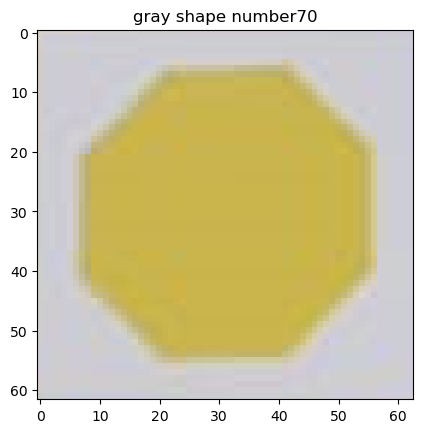

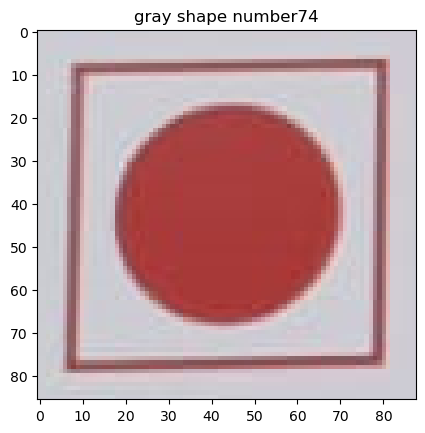

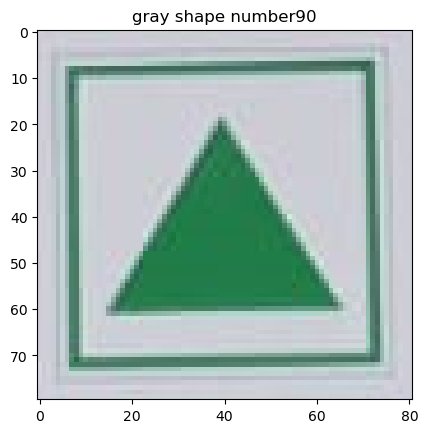

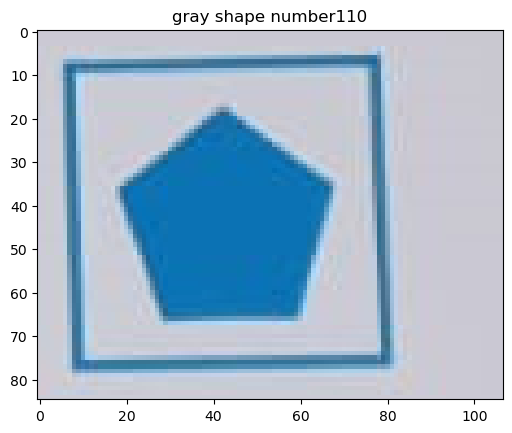

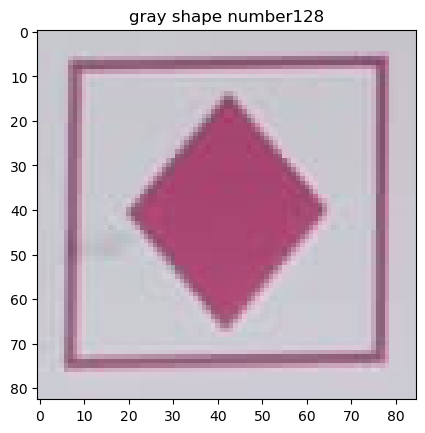

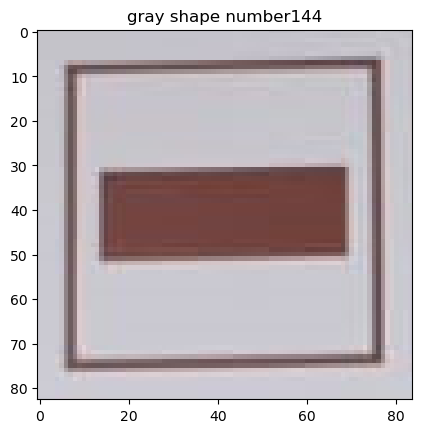

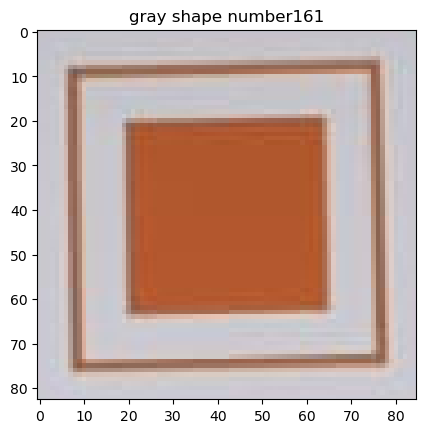

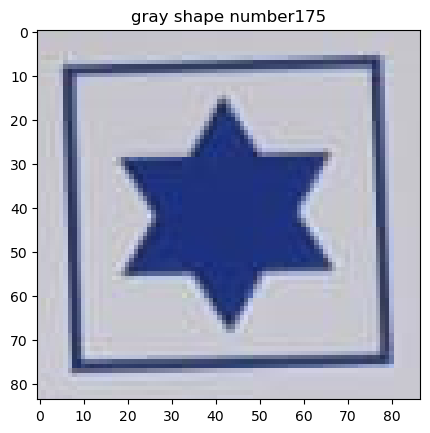

In [10]:
for i in range(len(filtered_cropped_shapes)):
    name = "gray shape number" + str(filtered_cropped_shapes_index[i])
    PlotCv2ImageWithPlt(filtered_cropped_shapes[i], name)

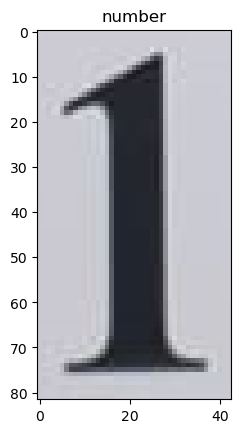

In [11]:
for i in range(len(filtered_cropped_numbers)):
    PlotCv2ImageWithPlt(filtered_cropped_numbers[i], 'number')

In [12]:
        shapes_index = 3
        GrayImage2 = cv2.cvtColor(filtered_cropped_shapes[shapes_index], cv2.COLOR_BGR2GRAY)
        ColorImage2 = filtered_cropped_shapes[shapes_index]
    
        dst2 = cv2.Canny(GrayImage2, 0, 240)
        blured2 = cv2.blur(dst2, (5, 5), 0)
        #blured2 = dst2
        kernel = np.array([[0, -1, 0],
                           [-1, 5,-1],
                           [0, -1, 0]])
        image_sharp = cv2.filter2D(src=GrayImage2, ddepth=-1, kernel=kernel)
        img_thresh2 = cv2.adaptiveThreshold(blured2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
        contours2 , hierarchy2 = cv2.findContours(img_thresh2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
        shapepp_image = []
        shapep_hierar = []
        shapep_recognition = []
        for i in range(len(contours2)):
            contour = contours2[i]
            approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
            x = approx.ravel()[0]
            y = approx.ravel()[1] - 5
            (xc, yc, w, h) = cv2.boundingRect(contour)
            color_tuple = GetBBLocationColor([xc, yc, w, h], cv2.cvtColor(ColorImage2, cv2.COLOR_BGR2RGB))
            if (1.1 >= w/h >= 0.9) and (w >= 15 and h >= 15):
                shapepp_image.append(ColorImage2[yc:yc + h, xc:xc + w])
                shapep_hierar.append(hierarchy2[0][i])
                shapep_recognition.append(RecognizeShape(approx, xc, yc, w, h, color_tuple))

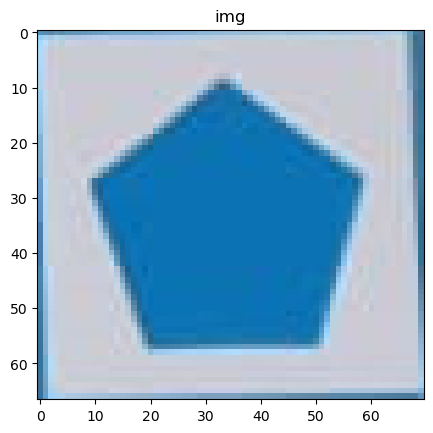

[15  4  6  1]
[6, 9, 9, 70, 67, (11, 114, 180)]
Star


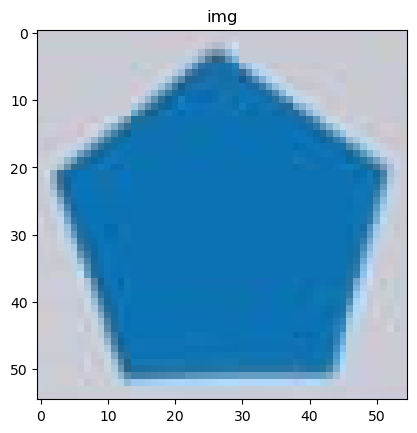

[11  7  9  5]
[5, 16, 15, 55, 55, (11, 114, 180)]
Hexagon


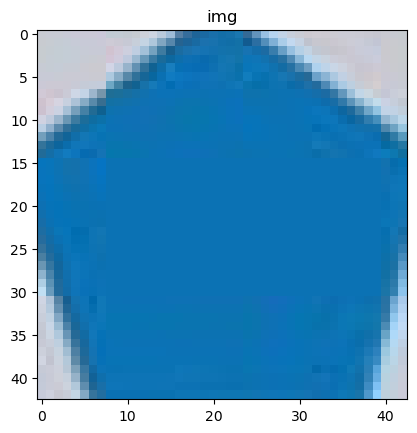

[-1 -1 10  8]
[4, 22, 21, 43, 43, (11, 114, 180)]
Pentagon


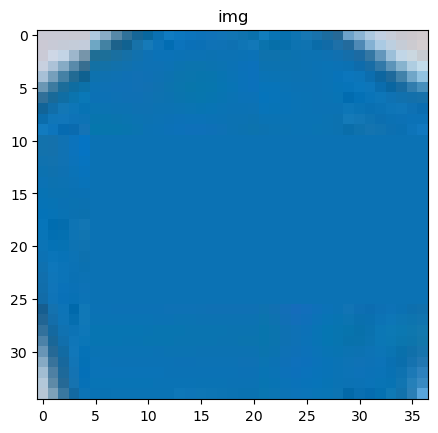

[-1 -1 -1  9]
[8, 25, 26, 37, 35, (11, 114, 180)]
Circle


In [13]:
#PlotCv2ImageWithPlt(shapepp_image[0], 'img')
for i in range(len(shapepp_image)):    
    PlotCv2ImageWithPlt(shapepp_image[i], 'img')
    print(shapep_hierar[i])
    print(shapep_recognition[i])
    print(FullShapeToShapeName(shapep_recognition[i]))

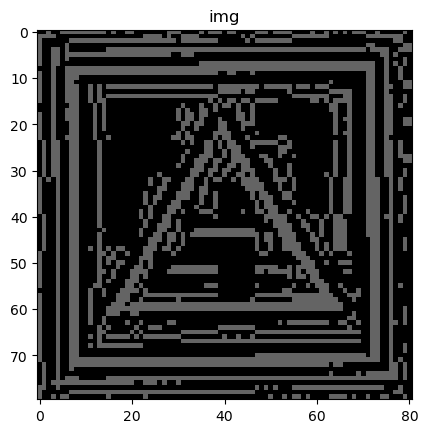

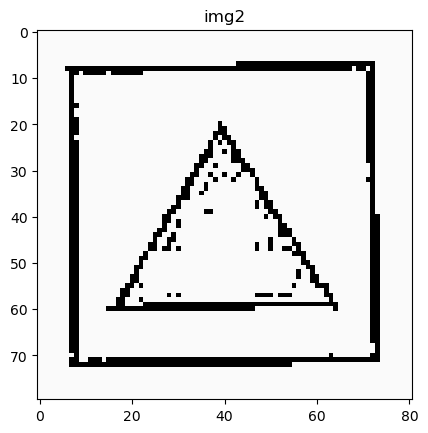

In [84]:
        shapes_index = 2
        GrayImage2 = cv2.cvtColor(filtered_cropped_shapes[shapes_index], cv2.COLOR_BGR2GRAY)
        ColorImage2 = filtered_cropped_shapes[shapes_index]
    
        dst2 = cv2.Canny(GrayImage2, 0, 240)
        blured2 = cv2.blur(dst2, (5, 5), 0)
        #blured2 = dst2
        kernel = np.array([[0, -1, 0],
                           [-1, 5,-1],
                           [0, -1, 0]])
        image_sharp = cv2.filter2D(src=GrayImage2, ddepth=-1, kernel=kernel)
        img_thresh2 = cv2.adaptiveThreshold(image_sharp, 100, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
        ret , thresh3 = cv2.threshold(image_sharp, 80 , 250, cv2.THRESH_BINARY)
        PlotCv2ImageWithPlt(img_thresh2, 'img')
        PlotCv2ImageWithPlt(thresh3, 'img2')
        contours2 , hierarchy2 = cv2.findContours(img_thresh2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
        shapepp_image = []
        shapep_hierar = []
        shapep_recognition = []
        for i in range(len(contours2)):
            contour = contours2[i]
            approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
            x = approx.ravel()[0]
            y = approx.ravel()[1] - 5
            (xc, yc, w, h) = cv2.boundingRect(contour)
            color_tuple = GetBBLocationColor([xc, yc, w, h], cv2.cvtColor(ColorImage2, cv2.COLOR_BGR2RGB))
            if (1.1 >= w/h >= 0.9) and (w >= 15 and h >= 15):
                shapepp_image.append(ColorImage2[yc:yc + h, xc:xc + w])
                shapep_hierar.append(hierarchy2[0][i])
                shapep_recognition.append(RecognizeShape(approx, xc, yc, w, h, color_tuple))

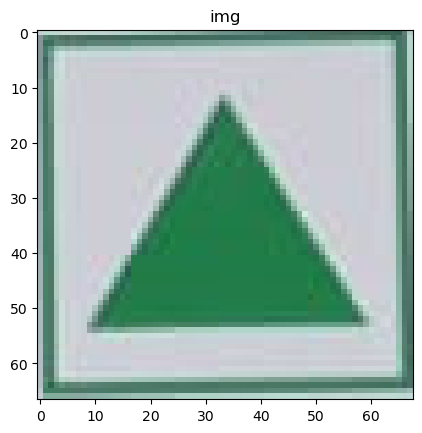

[88 24 26 -1]
[2, 6, 7, 68, 67, (31, 125, 73)]
Square


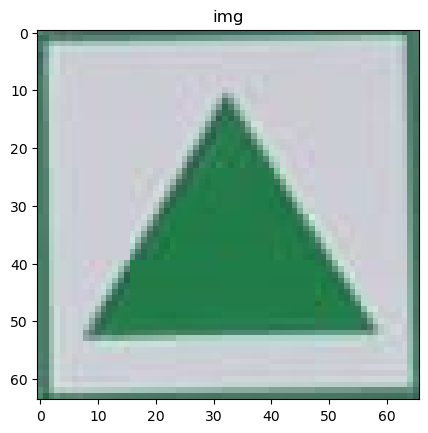

[-1 -1 27 25]
[2, 7, 8, 66, 64, (31, 125, 73)]
Square


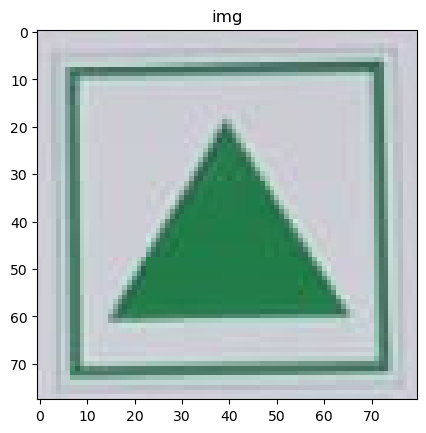

[96 94 -1 -1]
[8, 0, 0, 80, 78, (35, 125, 74)]
Circle


In [85]:
#PlotCv2ImageWithPlt(shapepp_image[0], 'img')
for i in range(len(shapepp_image)):    
    PlotCv2ImageWithPlt(shapepp_image[i], 'img')
    print(shapep_hierar[i])
    print(shapep_recognition[i])
    print(FullShapeToShapeName(shapep_recognition[i]))

In [98]:
    def medianCanny(img, thresh1, thresh2):
        median = numpy.median(img)
        img = cv2.Canny(img, int(thresh1 * median), int(thresh2 * median))
        return img    
    
        shapes_index = 2
        GrayImage2 = cv2.cvtColor(filtered_cropped_shapes[shapes_index], cv2.COLOR_BGR2GRAY)
        ColorImage2 = filtered_cropped_shapes[shapes_index]
    
        dst2 = cv2.Canny(GrayImage2, 0, 240)
        dst2 = medianCanny(GrayImage2, 0.2,0.3)
        image_sharp = cv2.filter2D(src=dst2, ddepth=-1, kernel=kernel)
        blurred = cv2.GaussianBlur(image_sharp, (3, 3), 0)
        img_thresh2 = cv2.adaptiveThreshold(image_sharp, 100, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
        ret , thresh3 = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)
        PlotCv2ImageWithPlt(img_thresh2, 'img')
        PlotCv2ImageWithPlt(thresh3, 'img2')
        contours2 , hierarchy2 = cv2.findContours(thresh3, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
        shapepp_image = []
        shapep_hierar = []
        shapep_recognition = []
        for i in range(len(contours2)):
            contour = contours2[i]
            approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
            x = approx.ravel()[0]
            y = approx.ravel()[1] - 5
            (xc, yc, w, h) = cv2.boundingRect(contour)
            color_tuple = GetBBLocationColor([xc, yc, w, h], cv2.cvtColor(ColorImage2, cv2.COLOR_BGR2RGB))
            if (1.1 >= w/h >= 0.9) and (w >= 15 and h >= 15):
                shapepp_image.append(ColorImage2[yc:yc + h, xc:xc + w])
                shapep_hierar.append(hierarchy2[0][i])
                shapep_recognition.append(RecognizeShape(approx, xc, yc, w, h, color_tuple))

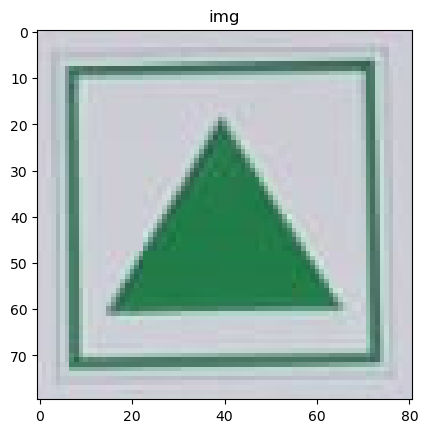

[-1 -1  1 -1]
[2, 0, 0, 81, 80, (31, 125, 73)]
Square


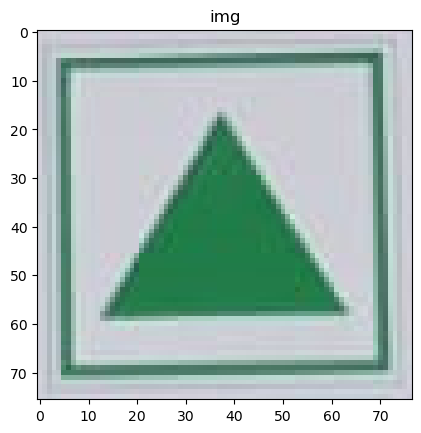

[-1  1  3  0]
[2, 2, 2, 77, 76, (31, 125, 73)]
Square


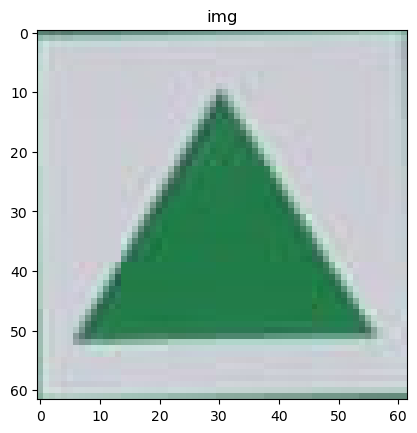

[24 -1  4  2]
[2, 9, 9, 62, 62, (31, 125, 73)]
Square


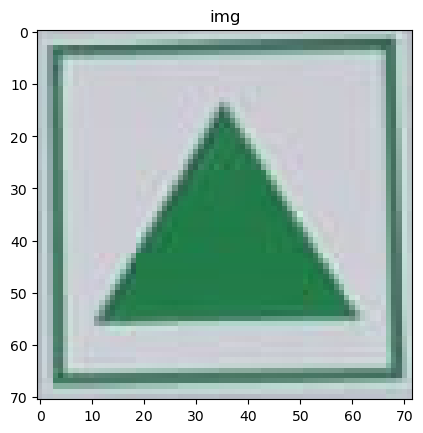

[-1  3 -1  2]
[6, 4, 5, 72, 71, (31, 125, 73)]
Star


In [99]:
#PlotCv2ImageWithPlt(shapepp_image[0], 'img')
for i in range(len(shapepp_image)):    
    PlotCv2ImageWithPlt(shapepp_image[i], 'img')
    print(shapep_hierar[i])
    print(shapep_recognition[i])
    print(FullShapeToShapeName(shapep_recognition[i]))